In [1]:
import numpy as np
import pandas as pd
import statistics
from matplotlib import pyplot as plt

In [2]:
traces = pd.read_csv('AES_Power_Trace.csv').to_numpy()

In [3]:
ciphertext = []
i = 0
while i < len(traces):
    ciphertext.append(traces[i][1])
    i = i + 1
# print(ciphertext)
    

In [4]:
key = 'b1'

In [5]:
inverse_sbox = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)

In [6]:
inverse_sbox[0]

82

In [7]:
bins = [[] for i in range(256)]

i = 0
while i < len(traces):
    ciphertext = traces[i][1]
    ciphertext_two = ciphertext[0:2]
    xored = int(key, 16) ^ int(ciphertext_two, 16)
    # print(xored)
    inv_sbox = inverse_sbox[xored]
    temp = []
    j = 2
    while j < 2002:
        temp.append(traces[i][j])
        j = j + 1
    bins[inv_sbox].append(temp)
    i = i + 1

# print(bins)
    


In [8]:
print(np.mean(bins[2]))

108.25797727272727


In [9]:
bins_mean = []
t = 0
while t < 256:
    k = len(bins[t])
    temp1 = []
    i = 0
    while i < 2000:
        sum = 0
        for j in range(len(bins[t])):
            sum = sum + bins[t][j][i]
        p = sum / k
        temp1.append(p)
        i = i + 1
    bins_mean.append(temp1) 
    t = t + 1
# print(bins_mean)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
temp_var = []
i = 0
while i < 2000:
    c1 = []
    j = 0
    while j < 256:
        c1.append(bins_mean[j][i])
        j = j + 1
    f = np.array(c1)
    temp_var.append(np.var(f))
    i = i + 1
        

In [11]:
print(temp_var[0])

0.04027934700178016


In [12]:
var = []
i = 2
while i < 2002:
    temp = []
    for x in traces:
        temp.append(x[i])
    f = np.array(temp)
    var.append(np.var(f))
    i = i + 1
    
    
    

In [13]:
print(len(var))

2000


In [14]:
nicv = []
for i in range(2000):
    y = temp_var[i] / var[i]
    nicv.append(y)

In [15]:
print(len(nicv))

2000


In [16]:
snr = []
for i in range(2000):
    t = nicv[i] / (1 - nicv[i])
    snr.append(t)
    

In [17]:
print(snr)

[0.03197457690017447, 0.03206860213541094, 0.029700197140432642, 0.029264039843502475, 0.02912078736618585, 0.028181232112691204, 0.03022621721769723, 0.031173327891811715, 0.028026200962133953, 0.029370448882634206, 0.027427236714236206, 0.027714864054621806, 0.029034357800551403, 0.02533817872468395, 0.02775205646178234, 0.028988462215645532, 0.029643546076929195, 0.028706264852534143, 0.027848621388244746, 0.026873326677584505, 0.02853839433320686, 0.03163451560548112, 0.03502728800748566, 0.029148131812717814, 0.027932858590873143, 0.030170832476831895, 0.02873427276291958, 0.029850418609965592, 0.02565743491108657, 0.027182661095065987, 0.029283363766853688, 0.03251770630241781, 0.03366399050969197, 0.03175878987170834, 0.03530954954686223, 0.030800457465903864, 0.03048208198850234, 0.026853042742705776, 0.027738367819390243, 0.02947179839135416, 0.032888709993433705, 0.03188488374707569, 0.0292342781024248, 0.026752968993081005, 0.032221504171414096, 0.0303618386703256, 0.0312096

In [18]:
x_axis = []
i = 0
while i < 2000:
    x_axis.append(i)
    i = i + 1

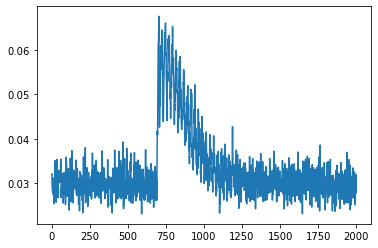

In [19]:
plt.plot(x_axis, snr)
plt.show()